In [103]:
using Jacobi
using PyPlot
include("../src/HPFEM.jl");

In [104]:
M= 10
Q=M+2
lagr = HPFEM.Lagrange1d(M);
quad = HPFEM.QuadType(Q);
base = HPFEM.Basis1d(lagr, quad);

In [105]:
elemento = HPFEM.Element1d(1, -1.0, 1.0, base);
Mass = HPFEM.mass_matrix(base, elemento);



In [106]:
fun(x) = sin(2*pi*x)
x = linspace(-1,1,101)
#plot(x,fun(x));

In [107]:
Fe = zeros(M)
fe = fun(elemento.x)
HPFEM.add_rhs!(base, elemento, fe, Fe)
uh = Mass\Fe
#plot(uh)


10-element Array{Float64,1}:
 -0.0192875
  0.490392 
  0.995898 
 -0.140235 
 -0.857408 
  0.857408 
  0.140235 
 -0.995898 
 -0.490392 
  0.0192875

In [108]:
Q2 = 101
x =linspace(-1,1,Q2)

linspace(-1.0,1.0,101)

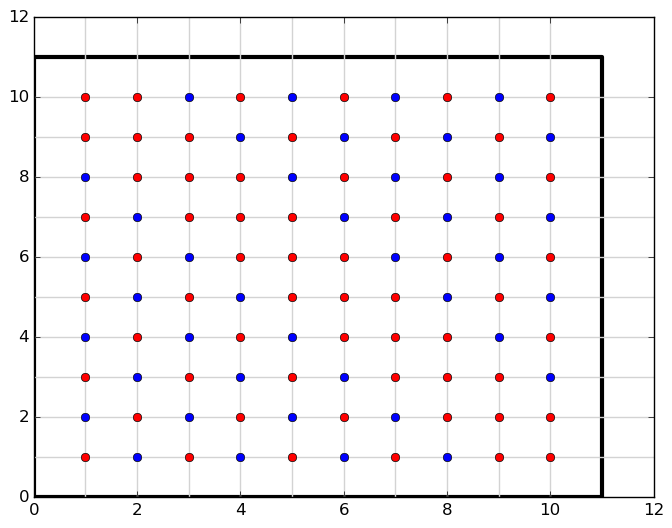

In [109]:
HPFEM.plot_matrix(Mass)

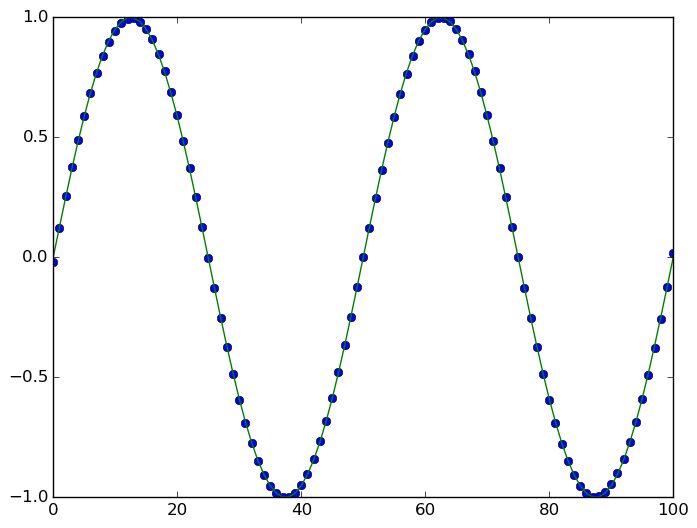

0.019287496795891115

In [110]:
#u = zeros(Q)
x = linspace(-1,1,101)
test = zeros(101,M)
for i in 1 :M
    test[:,i] = base(x,i)
end
plot(test*uh,"o")
plot(fun(x))

maxabs(test*uh - fun(x))